In [1]:
import urllib
from IPython.display import Markdown as md

### change to reflect your notebook
_nb_loc = "07_training/07c_export.ipynb"
_nb_title = "Saving model state"

_icons=["https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png", "https://www.tensorflow.org/images/colab_logo_32px.png", "https://www.tensorflow.org/images/GitHub-Mark-32px.png", "https://www.tensorflow.org/images/download_logo_32px.png"]
_links=["https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?" + urllib.parse.urlencode({"name": _nb_title, "download_url": "https://github.com/takumiohym/practical-ml-vision-book-ja/raw/master/"+_nb_loc}), "https://colab.research.google.com/github/takumiohym/practical-ml-vision-book-ja/blob/master/{0}".format(_nb_loc), "https://github.com/takumiohym/practical-ml-vision-book-ja/blob/master/{0}".format(_nb_loc), "https://raw.githubusercontent.com/takumiohym/practical-ml-vision-book-ja/master/{0}".format(_nb_loc)]
md("""<table class="tfo-notebook-buttons" align="left"><td><a target="_blank" href="{0}"><img src="{4}"/>Run in Vertex AI Workbench</a></td><td><a target="_blank" href="{1}"><img src="{5}" />Run in Google Colab</a></td><td><a target="_blank" href="{2}"><img src="{6}" />View source on GitHub</a></td><td><a href="{3}"><img src="{7}" />Download notebook</a></td></table><br/><br/>""".format(_links[0], _links[1], _links[2], _links[3], _icons[0], _icons[1], _icons[2], _icons[3]))

<table class="tfo-notebook-buttons" align="left"><td><a target="_blank" href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?name=Saving+model+state&download_url=https%3A%2F%2Fgithub.com%2Ftakumiohym%2Fpractical-ml-vision-book-ja%2Fraw%2Fmaster%2F07_training%2F07c_export.ipynb"><img src="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png"/>Run in Vertex AI Workbench</a></td><td><a target="_blank" href="https://colab.research.google.com/github/takumiohym/practical-ml-vision-book-ja/blob/master/07_training/07c_export.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a></td><td><a target="_blank" href="https://github.com/takumiohym/practical-ml-vision-book-ja/blob/master/07_training/07c_export.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a></td><td><a href="https://raw.githubusercontent.com/takumiohym/practical-ml-vision-book-ja/master/07_training/07c_export.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a></td></table><br/><br/>

# モデルの状態を保存する

このノートブックでは、モデルをエクスポートする方法を確認します。

## 実行環境
このノートブックは、TPU上でもGPU上でも実行可能です。

Vertex AI WorkbenchやColabでGPUやTPUを使用する方法については[実行環境のセットアップ
](https://github.com/takumiohym/practical-ml-vision-book-ja/tree/main/environment_setup)を参照してください。

In [1]:
import os, shutil
import tensorflow as tf

try: # detect TPUs
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # detect GPUs or multi-GPU machines
    strategy = tf.distribute.MirroredStrategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

2022-12-11 16:03:21.439375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-11 16:03:21.439425: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-11 16:03:23.525380: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-11 16:03:23.525456: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-11 16:03:23.525483: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tpu-direct): /proc/driver/nvidia/version does not exist


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


2022-12-11 16:03:23.746911: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 16:03:23.760296: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:272] Initialize GrpcChannelCache for job worker -> {0 -> 10.112.92.178:8470}
2022-12-11 16:03:23.760336: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:272] Initialize GrpcChannelCache for job localhost -> {0 -> localhost:54247}
2022-12-11 16:03:23.777541: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:272] Initialize GrpcChannelCache for job worker -> {0 -> 10.112.92.178:8470}
2022-12-11 16:03:23.777580: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:272] Initialize GrpcChannelCache for job localhost -> {0 -> localhost:54247}
2022-1

INFO:tensorflow:Initializing the TPU system: tpu-direct


INFO:tensorflow:Initializing the TPU system: tpu-direct


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [2]:
# If you are running on Colaboratory, you must authenticate
# for Colab to have write access to the bucket.

IS_COLAB_BACKEND = 'COLAB_RELEASE_TAG' in os.environ  # this is always set on Colab, the value is 0 or 1 depending on GPU presence
if IS_COLAB_BACKEND:
    from google.colab import auth
    auth.authenticate_user()


## Google Cloud Storageバケットの作成
最終的なモデルの保存先として、Google Cloud Storageを利用します。<br>
また、TPUを利用する場合は、学習中に作成するCheckpointデータもGCSへ保存します。

以下のBUCKETの値を使用可能なGSCバケット名に変更して進めてください。<br>
使用できるバケットがない場合は、以下の二行目と三行目のコマンドをコメントアウトし、PROJECTにGoogle Cloudプロジェク名を指定し、gsutil mbコマンドを実行して作成してください。

In [3]:
BUCKET='BUCKET_NAME' # Specify your GCS bucket name
PROJECT = 'PROJECT_NAME'
!gsutil mb -l us-central1 -p {PROJECT} gs://{BUCKET} 

Creating gs://takumi-07-test-2/...


Colabから実行する際は、以下を実行してColabのTPU用サービスアカウントからのアクセスを許可してください。
（ColabのTPUのサービスアカウントには以下の値が使用されていますが、もし後ほどアクセスエラーが出る場合は、以下のCOLAB_TPU_SERVICE_ACCOUNTをエラーメッセージに出力される`service-@cloud-tpu.iam.gserviceaccount.com`に置き換えて次のセルを再実行してください。

同時に、保存先に関するいくつかの変数を設定しておきましょう。<br>
TPUの場合にはチェックポイントをGCS上に、その他GPUなどの環境ではローカルパスに保存するようにしています。

In [4]:
if type(strategy) == tf.distribute.TPUStrategy:
    if IS_COLAB_BACKEND:
        COLAB_TPU_SERVICE_ACCOUNT = "service-495559152420@cloud-tpu.iam.gserviceaccount.com"
        !gsutil iam ch serviceAccount:{COLAB_TPU_SERVICE_ACCOUNT}:objectAdmin gs://{BUCKET}
        !gsutil iam ch serviceAccount:{COLAB_TPU_SERVICE_ACCOUNT}:admin gs://{BUCKET}

    checkpoint_path = f'gs://{BUCKET}/07_export/chpt'
else:
    checkpoint_path = './chpt'
    shutil.rmtree(checkpoint_path, ignore_errors=True)
    os.mkdir(checkpoint_path)
    
export_path = f'gs://{BUCKET}/07_export/export'

## 学習用コード  

ここでは、[../06_preprocessing/06e_colordistortion.ipynb](https://github.com/takumiohym/practical-ml-vision-book-ja/blob/main/06_preprocessing/06e_colordistortion.ipynb)のコードを使用します。<br>
また、[./07a_ingest.ipynb](https://github.com/takumiohym/practical-ml-vision-book-ja/blob/main/07_training/07a_ingest.ipynb)で最も効率的だったデータパイプラインに変更しています。

In [5]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import os
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'UNCOMPRESSED'    

from tensorflow.data.experimental import AUTOTUNE

IMG_HEIGHT = 448 # note *twice* what we used to have
IMG_WIDTH = 448
IMG_CHANNELS = 3
CLASS_NAMES = 'daisy dandelion roses sunflowers tulips'.split()

def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])
    
class _Preprocessor:    
    def __init__(self):
        # nothing to initialize
        pass
    
    def read_from_tfr(self, proto):
        feature_description = {
            'image': tf.io.VarLenFeature(tf.float32),
            'shape': tf.io.VarLenFeature(tf.int64),
            'label': tf.io.FixedLenFeature([], tf.string, default_value=''),
            'label_int': tf.io.FixedLenFeature([], tf.int64, default_value=0),
        }
        rec = tf.io.parse_single_example(
            proto, feature_description
        )
        shape = tf.sparse.to_dense(rec['shape'])
        img = tf.reshape(tf.sparse.to_dense(rec['image']), shape)
        label_int = rec['label_int']
        return img, label_int
    
    def read_from_jpegfile(self, filename):
        # same code as in 05_create_dataset/jpeg_to_tfrecord.py
        img = tf.io.read_file(filename)
        img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
        img = tf.image.convert_image_dtype(img, tf.float32)
        return img
      
    def preprocess(self, img):
        return tf.image.resize_with_pad(img, IMG_HEIGHT, IMG_WIDTH)

# most efficient way to read the data
# as determined in 07a_ingest.ipynb
# splits the files into two halves and interleaves datasets
def create_preproc_dataset(pattern):
    """
    Does interleaving, parallel calls, prefetch, batching
    Caching is not a good idea on large datasets.
    """
    preproc = _Preprocessor()
    files = [filename for filename in tf.io.gfile.glob(pattern)]
    if len(files) > 1:
        print("Interleaving the reading of {} files.".format(len(files)))
        def _create_half_ds(x):
            if x == 0:
                half = files[:(len(files)//2)]
            else:
                half = files[(len(files)//2):]
            return tf.data.TFRecordDataset(half,
                                          compression_type='GZIP')
        trainds = tf.data.Dataset.range(2).interleave(
            _create_half_ds, num_parallel_calls=AUTOTUNE)
    else:
        trainds = tf.data.TFRecordDataset(files,
                                         compression_type='GZIP')
    def _preproc_img_label(img, label):
        return (preproc.preprocess(img), label)
    
    trainds = (trainds
               .map(preproc.read_from_tfr, num_parallel_calls=AUTOTUNE)
               .map(_preproc_img_label, num_parallel_calls=AUTOTUNE)
               .shuffle(200)
               .prefetch(AUTOTUNE)
              )
    return trainds

def create_preproc_image(filename):
    preproc = _Preprocessor()
    img = preproc.read_from_jpegfile(filename)
    return preproc.preprocess(img)

class RandomColorDistortion(tf.keras.layers.Layer):
    def __init__(self, contrast_range=[0.5, 1.5], 
                 brightness_delta=[-0.2, 0.2], **kwargs):
        super(RandomColorDistortion, self).__init__(**kwargs)
        self.contrast_range = contrast_range
        self.brightness_delta = brightness_delta
    
    def call(self, images, training=None):
        if not training:
            return images
        
        contrast = np.random.uniform(
            self.contrast_range[0], self.contrast_range[1])
        brightness = np.random.uniform(
            self.brightness_delta[0], self.brightness_delta[1])
        
        images = tf.image.adjust_contrast(images, contrast)
        images = tf.image.adjust_brightness(images, brightness)
        images = tf.clip_by_value(images, 0, 1)
        return images

## 学習

In [6]:
#PATTERN_SUFFIX, NUM_EPOCHS = '-0000[01]-*', 3 # small
PATTERN_SUFFIX, NUM_EPOCHS = '-*', 20 # full

In [7]:
def train_and_evaluate(batch_size = 32,
                       lrate = 0.001,
                       l1 = 0.,
                       l2 = 0.,
                       num_hidden = 16):
    regularizer = tf.keras.regularizers.l1_l2(l1, l2)
    
    train_dataset = create_preproc_dataset(
        'gs://practical-ml-vision-book/flowers_tfr/train' + PATTERN_SUFFIX
    ).batch(batch_size)
    eval_dataset = create_preproc_dataset(
        'gs://practical-ml-vision-book/flowers_tfr/valid' + PATTERN_SUFFIX
    ).batch(batch_size)

    layers = [
      tf.keras.layers.RandomCrop(
          height=IMG_HEIGHT//2, width=IMG_WIDTH//2,
          input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
          name='random/center_crop'
      ),
      tf.keras.layers.RandomFlip(
          mode='horizontal',
          name='random_lr_flip/none'
      ),
      RandomColorDistortion(name='random_contrast_brightness/none'),
      hub.KerasLayer(
          "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
          trainable=False,
          name='mobilenet_embedding'),
      tf.keras.layers.Dense(num_hidden,
                            kernel_regularizer=regularizer, 
                            activation=tf.keras.activations.relu,
                            name='dense_hidden'),
      tf.keras.layers.Dense(len(CLASS_NAMES), 
                            kernel_regularizer=regularizer,
                            activation='softmax',
                            name='flower_prob')
    ]

    # checkpoint and early stopping callbacks
    model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_accuracy', mode='max',
        save_best_only=True)
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', mode='max',
        patience=2)
    
    # model training
    model = tf.keras.Sequential(layers, name='flower_classification')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=False),
                  metrics=['accuracy']
                 )
    print(model.summary())
    history = model.fit(train_dataset, 
                        validation_data=eval_dataset,
                        epochs=NUM_EPOCHS,
                        callbacks=[model_checkpoint_cb, early_stopping_cb]
                       )
    training_plot(['loss', 'accuracy'], history)
    return model


Interleaving the reading of 16 files.
Interleaving the reading of 2 files.
Model: "flower_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random/center_crop (RandomC  (None, 224, 224, 3)      0         
 rop)                                                            
                                                                 
 random_lr_flip/none (Random  (None, 224, 224, 3)      0         
 Flip)                                                           
                                                                 
 random_contrast_brightness/  (None, 224, 224, 3)      0         
 none (RandomColorDistortion                                     
 )                                                               
                                                                 
 mobilenet_embedding (KerasL  (None, 1280)             2257984   
 ayer)                              

2022-12-11 16:07:22.343136: W ./tensorflow/core/distributed_runtime/eager/destroy_tensor_handle_node.h:57] Ignoring an error encountered when deleting remote tensors handles: INVALID_ARGUMENT: Unable to find the relevant tensor remote_handle: Op ID: 1618, Output num: 1
Additional GRPC error information from remote target /job:worker/replica:0/task:0:
:{"created":"@1670774842.339752086","description":"Error received from peer ipv4:10.112.92.178:8470","file":"external/com_github_grpc_grpc/src/core/lib/surface/call.cc","file_line":1056,"grpc_message":"Unable to find the relevant tensor remote_handle: Op ID: 1618, Output num: 1","grpc_status":3}
2022-12-11 16:07:25.519417: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/chpt/assets


INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/chpt/assets


92/92 [==============================] - 32s 287ms/step - loss: 0.7845 - accuracy: 0.7140 - val_loss: 0.5283 - val_accuracy: 0.8083
Epoch 2/20
92/92 [==============================] - ETA: 0s - loss: 0.4502 - accuracy: 0.8419

INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/chpt/assets


INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/chpt/assets


92/92 [==============================] - 24s 253ms/step - loss: 0.4502 - accuracy: 0.8419 - val_loss: 0.4336 - val_accuracy: 0.8290
Epoch 3/20
92/92 [==============================] - ETA: 0s - loss: 0.3909 - accuracy: 0.8650

INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/chpt/assets


INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/chpt/assets


92/92 [==============================] - 25s 261ms/step - loss: 0.3909 - accuracy: 0.8650 - val_loss: 0.4353 - val_accuracy: 0.8316
Epoch 4/20
92/92 [==============================] - ETA: 0s - loss: 0.3524 - accuracy: 0.8831

INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/chpt/assets


INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/chpt/assets


92/92 [==============================] - 24s 255ms/step - loss: 0.3524 - accuracy: 0.8831 - val_loss: 0.3844 - val_accuracy: 0.8549
Epoch 5/20
92/92 [==============================] - 13s 137ms/step - loss: 0.3279 - accuracy: 0.8899 - val_loss: 0.3736 - val_accuracy: 0.8523
Epoch 6/20
92/92 [==============================] - ETA: 0s - loss: 0.3333 - accuracy: 0.8817

INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/chpt/assets


INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/chpt/assets


92/92 [==============================] - 24s 254ms/step - loss: 0.3333 - accuracy: 0.8817 - val_loss: 0.3874 - val_accuracy: 0.8627
Epoch 7/20
92/92 [==============================] - 13s 137ms/step - loss: 0.3143 - accuracy: 0.8858 - val_loss: 0.3731 - val_accuracy: 0.8601
Epoch 8/20
92/92 [==============================] - ETA: 0s - loss: 0.2923 - accuracy: 0.8981

INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/chpt/assets


INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/chpt/assets


92/92 [==============================] - 24s 256ms/step - loss: 0.2923 - accuracy: 0.8981 - val_loss: 0.3538 - val_accuracy: 0.8808
Epoch 9/20
92/92 [==============================] - 14s 138ms/step - loss: 0.2732 - accuracy: 0.9070 - val_loss: 0.3651 - val_accuracy: 0.8731
Epoch 10/20
92/92 [==============================] - 14s 139ms/step - loss: 0.2838 - accuracy: 0.8988 - val_loss: 0.4097 - val_accuracy: 0.8523


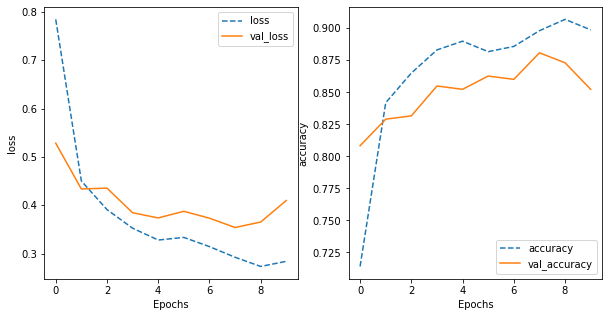

In [8]:
model = train_and_evaluate()

## モデルの保存、読み込み

モデルをSavedModelとしエクスポートし、それをロードして予測を行います。

In [9]:
model.save(export_path)

INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/export/assets


INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/export/assets


In [10]:
!saved_model_cli show --tag_set serve --signature_def serving_default --dir {export_path}

2022-12-11 16:10:54.014462: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-11 16:10:54.014515: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
The given SavedModel SignatureDef contains the following input(s):
  inputs['random/center_crop_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 448, 448, 3)
      name: serving_default_random_center_crop_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['flower_prob'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 5)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


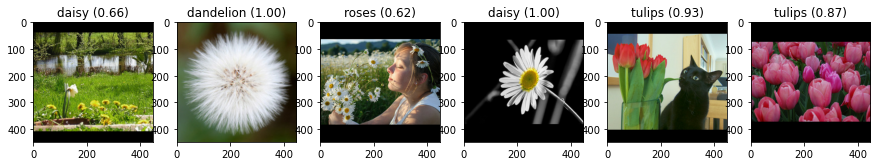

In [11]:
## for prediction, we won't have TensorFlow Records.
## this is how we'd predict for individual images
filenames = [
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/9818247_e2eac18894.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/9853885425_4a82356f1d_m.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/9158041313_7a6a102f7a_n.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/9299302012_958c70564c_n.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/8733586143_3139db6e9e_n.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/8713397358_0505cc0176_n.jpg'
]
serving_model = tf.keras.models.load_model(export_path)
input_images = [create_preproc_image(f) for f in filenames]
f, ax = plt.subplots(1, 6, figsize=(15,15))
for idx, img in enumerate(input_images):
    ax[idx].imshow((img.numpy()));
    batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
    batch_pred = serving_model.predict(batch_image)
    pred = batch_pred[0]
    pred_label_index = tf.math.argmax(pred).numpy()
    pred_label = CLASS_NAMES[pred_label_index]
    prob = pred[pred_label_index]
    ax[idx].set_title('{} ({:.2f})'.format(pred_label, prob))

## Signatureの提供  

モデルを呼び出すクライアント側でこのすべての処理を行うことを期待することは現実的ではありません。<br>
ここでは2つの変更を加えます。

1. シンプルにファイルの名前を受け取れるよう、Serving Signatureを定義する  
1. ファイル名のバッチを受け取れるようにコードをベクトル化し、すべてを一度に実行できるようにする

In [12]:
## it's better to vectorize the prediction
filenames = tf.convert_to_tensor([
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/9818247_e2eac18894.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/9853885425_4a82356f1d_m.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/9158041313_7a6a102f7a_n.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/9299302012_958c70564c_n.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/8733586143_3139db6e9e_n.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/8713397358_0505cc0176_n.jpg'
])
print(filenames)
input_images = tf.map_fn(create_preproc_image, 
                         filenames, fn_output_signature=tf.float32)
batch_pred = serving_model.predict(input_images)
print('full probs:\n', batch_pred)
top_prob = tf.math.reduce_max(batch_pred, axis=[1])
print('top prob:\n', top_prob)
pred_label_index = tf.math.argmax(batch_pred, axis=1)
print('top cls:\n', pred_label_index)
pred_label = tf.gather(tf.convert_to_tensor(CLASS_NAMES), pred_label_index)
print(pred_label)

tf.Tensor(
[b'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/9818247_e2eac18894.jpg'
 b'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/9853885425_4a82356f1d_m.jpg'
 b'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/9158041313_7a6a102f7a_n.jpg'
 b'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/9299302012_958c70564c_n.jpg'
 b'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/8733586143_3139db6e9e_n.jpg'
 b'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/8713397358_0505cc0176_n.jpg'], shape=(6,), dtype=string)
full probs:
 [[6.63675964e-01 4.83841449e-02 2.67297495e-02 2.34055489e-01
  2.71546077e-02]
 [1.86249337e-04 9.99743879e-01 1.07897395e-05 1.40530001e-05
  4.48763312e-05]
 [1.05985276e-01 6.31926535e-03 6.21066272e-01 6.00705743e-02
  2.06558630e-01]
 [9.95975792e-01 1.78495990e-04 3.26184681e-06 3.83447856e-03
  8.03140392e-06]
 [4.58237901e-03 1.44689134e-03 3.2502096

以下で新しいサービングシグネチャを定義し、再度モデルを保存します。

In [13]:
@tf.function(input_signature=[tf.TensorSpec([None,], dtype=tf.string)])
def predict_flower_type(filenames):
    input_images = tf.map_fn(
        create_preproc_image,
        filenames,
        fn_output_signature=tf.float32
    )
    batch_pred = model(input_images) # same as model.predict()
    top_prob = tf.math.reduce_max(batch_pred, axis=[1])
    pred_label_index = tf.math.argmax(batch_pred, axis=1)
    pred_label = tf.gather(tf.convert_to_tensor(CLASS_NAMES), pred_label_index)
    return {
        'probability': top_prob,
        'flower_type_int': pred_label_index,
        'flower_type_str': pred_label
    }

model.save(export_path,
          signatures={
              'serving_default': predict_flower_type
          })

INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/export/assets


INFO:tensorflow:Assets written to: gs://takumi-07-test-2/07_export/export/assets


In [14]:
serving_fn = tf.keras.models.load_model(export_path).signatures['serving_default']
filenames = [
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/9818247_e2eac18894.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/9853885425_4a82356f1d_m.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/9158041313_7a6a102f7a_n.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/9299302012_958c70564c_n.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/8733586143_3139db6e9e_n.jpg',
    'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/8713397358_0505cc0176_n.jpg'
]
pred = serving_fn(tf.convert_to_tensor(filenames))
print(pred)
print('******')
print(pred['flower_type_str'].numpy())

{'flower_type_str': <tf.Tensor: shape=(6,), dtype=string, numpy=
array([b'daisy', b'dandelion', b'roses', b'daisy', b'tulips', b'tulips'],
      dtype=object)>, 'flower_type_int': <tf.Tensor: shape=(6,), dtype=int64, numpy=array([0, 1, 2, 0, 4, 4])>, 'probability': <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.66367596, 0.9998505 , 0.6210663 , 0.9959758 , 0.9257107 ,
       0.8676614 ], dtype=float32)>}
******
[b'daisy' b'dandelion' b'roses' b'daisy' b'tulips' b'tulips']


出力が変更されたことが確認できます。

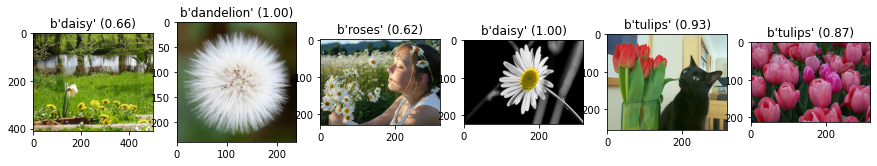

In [15]:
f, ax = plt.subplots(1, 6, figsize=(15,15))
for idx, (filename, prob, pred_label) in enumerate(
        zip(filenames, pred['probability'].numpy(), pred['flower_type_str'].numpy())):
    
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=3)
    ax[idx].imshow((img.numpy()));
    
    ax[idx].set_title('{} ({:.2f})'.format(pred_label, prob))    

## License
Copyright 2022 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.